In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [53]:
abalon=pd.read_csv('F:/Data_Trained/Data_set/abalone.data',names=['Sex','Length','Diameter','Height',
                    'whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],header=0)

In [54]:
abalon

,Sex,Length,Diameter,Height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,14


In [55]:
abalon.describe()

,Length,Diameter,Height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [56]:
# To  find missing values
abalon.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [57]:
# No Null values found

In [58]:
# Check data type
abalon.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [248]:
abalon.head()

,Length,Diameter,Height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [249]:
abalon['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

To Check Cooreltion

In [60]:
abaloncorr=abalon.corr()

In [61]:
abaloncorr

,Length,Diameter,Height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


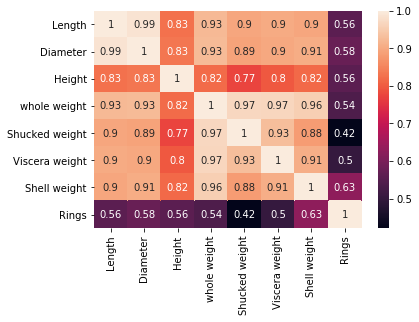

In [63]:
sns.heatmap(abaloncorr,annot=True)

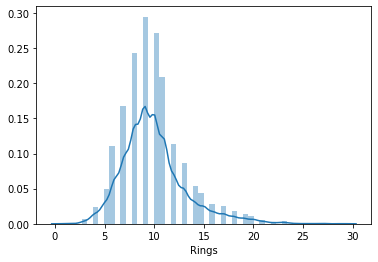

In [64]:
# To check distribution of skewness
sns.distplot(abalon['Rings'])

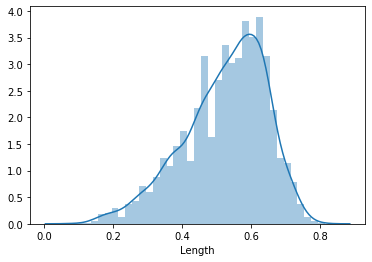

In [65]:
sns.distplot(abalon['Length'])

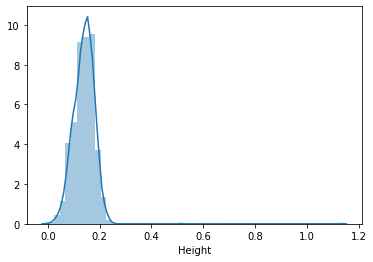

In [66]:
sns.distplot(abalon['Height'])

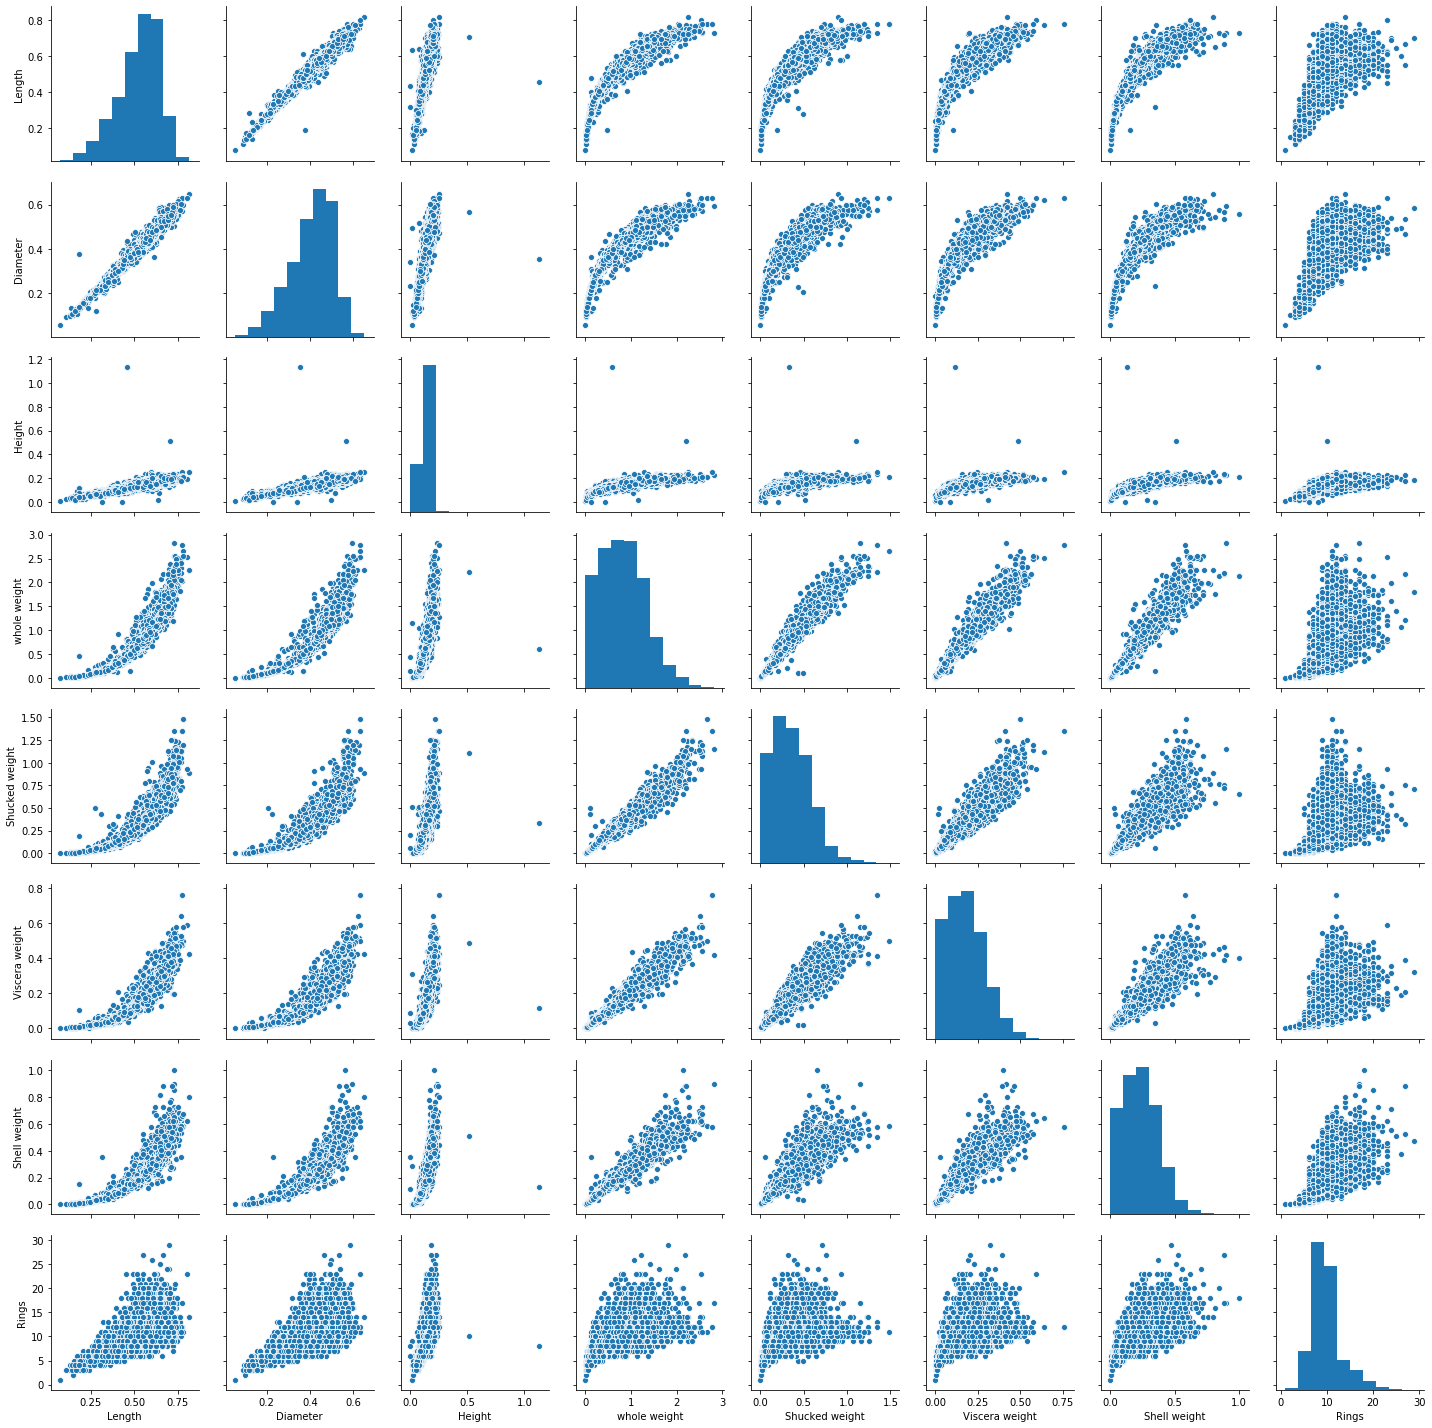

In [75]:
sns.pairplot(abalon)

In [76]:
# Nonegatively skewed data

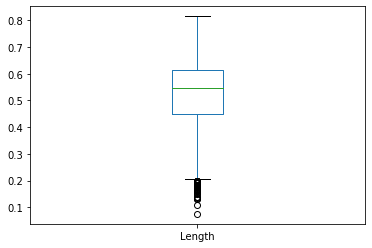

In [77]:
# Finding outliers
# Lets check for columns
abalon['Length'].plot.box()

In [78]:
# Bivariate outliers

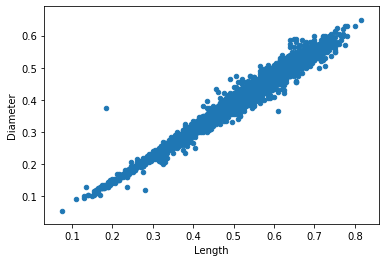

In [89]:
abalon.plot.scatter('Length','Diameter')

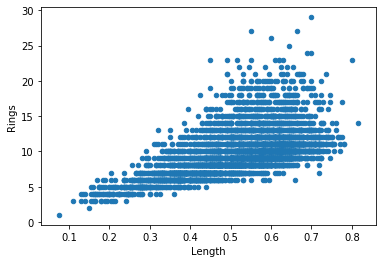

In [90]:
abalon.plot.scatter('Length','Rings')

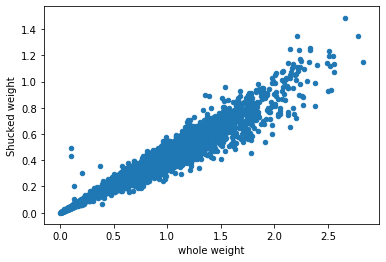

In [80]:
abalon.plot.scatter('whole weight','Shucked weight')

In [81]:
abalon.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [82]:
# Creating dummy variable for categorical variable
abalon=pd.get_dummies(abalon)

In [226]:
# Using z score method to remove outlier
z=np.abs(zscore(abalon))
ab1=abalon[(z<3).all(axis=1)]

In [227]:
abalon.shape,ab1.shape

((4176, 11), (4026, 11))

In [228]:
# Checcking skewness of data
skw=ab1.skew()
skw

Length           -0.623453
Diameter         -0.598910
Height           -0.244820
whole weight      0.333803
Shucked weight    0.457905
Viscera weight    0.436702
Shell weight      0.349071
Rings             0.726115
Sex_F             0.820760
Sex_I             0.731225
Sex_M             0.577223
dtype: float64

In [229]:
ab1['Rings']=np.log1p(ab1['Rings'])

In [230]:
skw=ab1.skew()
skw

Length           -0.623453
Diameter         -0.598910
Height           -0.244820
whole weight      0.333803
Shucked weight    0.457905
Viscera weight    0.436702
Shell weight      0.349071
Rings            -0.158076
Sex_F             0.820760
Sex_I             0.731225
Sex_M             0.577223
dtype: float64

In [208]:
ab1.head()

,Length,Diameter,Height,whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [231]:
# Columns Ring is the target varible
# We will separate target and rest columns
df_x=ab1.drop(columns='Rings')
y=ab1['Rings']

In [236]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [237]:
x.shape,y.shape

((4026, 10), (4026,))

In [238]:
x.columns

Index(['Length', 'Diameter', 'Height', 'whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [239]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       2.079442
1       2.302585
2       2.397895
3       2.079442
4       2.197225
6       2.833213
7       2.302585
8       2.995732
9       2.708050
10      2.397895
11      2.484907
12      2.397895
13      2.397895
14      2.564949
15      2.079442
16      2.397895
17      2.079442
18      2.302585
19      2.484907
20      2.397895
21      2.564949
22      2.302585
23      2.397895
24      2.484907
25      2.484907
26      2.564949
27      2.772589
28      2.484907
29      2.397895
30      2.772589
          ...   
4145    2.397895
4146    2.484907
4148    1.945910
4149    2.079442
4150    1.945910
4151    2.079442
4152    2.197225
4153    1.945910
4154    1.945910
4155    2.197225
4156    2.197225
4157    2.197225
4158    2.302585
4159    2.484907
4160    2.484907
4161    2.197225
4162    2.079442
4163    2.079442
4164    2.079442
4165    2.397895
4166    2.302585
4167    2.197225
4168    2.397895
4169    2.397895
4170    2.197225
4171

In [240]:
# Finding best r_state
def maxr2_score(lr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        print('r2 score corresponding to random state',r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to ', final_r_state," is ",max_r_score)
    return final_r_state

In [241]:
# Lets use LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to random state 42  is  0.5329185391950864
r2 score corresponding to random state 43  is  0.5716864489245777
r2 score corresponding to random state 44  is  0.5848205361079923
r2 score corresponding to random state 45  is  0.6164138857892507
r2 score corresponding to random state 46  is  0.5466372523426284
r2 score corresponding to random state 47  is  0.5914445695320603
r2 score corresponding to random state 48  is  0.5485961522622373
r2 score corresponding to random state 49  is  0.573351938734692
r2 score corresponding to random state 50  is  0.598519188646476
r2 score corresponding to random state 51  is  0.5763453428686183
r2 score corresponding to random state 52  is  0.5567496468032102
r2 score corresponding to random state 53  is  0.588644549013092
r2 score corresponding to random state 54  is  0.5661052221619169
r2 score corresponding to random state 55  is  0.5834754125563284
r2 score corresponding to random state 56  is  0.5958220557061977
r2 score corr

In [242]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 18}

In [243]:
# Lets use KNN regression model
knr=KNeighborsRegressor(n_neighbors=18)
r_state=maxr2_score(knr,x,y)


r2 score corresponding to random state 42  is  0.5591457040598211
r2 score corresponding to random state 43  is  0.6159558095860083
r2 score corresponding to random state 44  is  0.6146562683579725
r2 score corresponding to random state 45  is  0.6359898829682176
r2 score corresponding to random state 46  is  0.5613491630371477
r2 score corresponding to random state 47  is  0.6105342987287237
r2 score corresponding to random state 48  is  0.5687618392461862
r2 score corresponding to random state 49  is  0.5905135803524574
r2 score corresponding to random state 50  is  0.5894584500689071
r2 score corresponding to random state 51  is  0.5618350264582642
r2 score corresponding to random state 52  is  0.5722786513401801
r2 score corresponding to random state 53  is  0.5952526235846008
r2 score corresponding to random state 54  is  0.5812365843368674
r2 score corresponding to random state 55  is  0.6013608690291299
r2 score corresponding to random state 56  is  0.5874946401489399
r2 score c

In [244]:
# using Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [245]:
# Lts check max r2 score 
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to random state 42  is  0.537152368555377
r2 score corresponding to random state 43  is  0.5719680158216496
r2 score corresponding to random state 44  is  0.5785161491773014
r2 score corresponding to random state 45  is  0.6142531950272246
r2 score corresponding to random state 46  is  0.5418856525675445
r2 score corresponding to random state 47  is  0.5873232458424974
r2 score corresponding to random state 48  is  0.5451563768475146
r2 score corresponding to random state 49  is  0.5755325475794443
r2 score corresponding to random state 50  is  0.5967027616790017
r2 score corresponding to random state 51  is  0.57298972976549
r2 score corresponding to random state 52  is  0.5516925300186548
r2 score corresponding to random state 53  is  0.5847238861059276
r2 score corresponding to random state 54  is  0.5664426926117585
r2 score corresponding to random state 55  is  0.5765899044721134
r2 score corresponding to random state 56  is  0.5888293823693952
r2 score corr

In [246]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [247]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to random state 42  is  0.580748715440515
r2 score corresponding to random state 43  is  0.6316542870482182
r2 score corresponding to random state 44  is  0.6354043045211759
r2 score corresponding to random state 45  is  0.6542704007552409
r2 score corresponding to random state 46  is  0.5844236062816583
r2 score corresponding to random state 47  is  0.6309602333544397
r2 score corresponding to random state 48  is  0.5842193635380054
r2 score corresponding to random state 49  is  0.6163110483053773
r2 score corresponding to random state 50  is  0.6206111184829937
r2 score corresponding to random state 51  is  0.6041870528496067
r2 score corresponding to random state 52  is  0.5968188637416281
r2 score corresponding to random state 53  is  0.6121289376762884
r2 score corresponding to random state 54  is  0.6149491323911527
r2 score corresponding to random state 55  is  0.6293826296705707
r2 score corresponding to random state 56  is  0.6231117485547952
r2 score co

In [181]:
# Use adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[lr,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [183]:
Dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=Dt,learning_rate=1,n_estimators=500)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to random state 42  is  0.5526949810477333
r2 score corresponding to random state 43  is  0.5986021393072098
r2 score corresponding to random state 44  is  0.620139609050741
r2 score corresponding to random state 45  is  0.6341857171140819
r2 score corresponding to random state 46  is  0.562109438015725
r2 score corresponding to random state 47  is  0.6245814226433449
r2 score corresponding to random state 48  is  0.5633849932404444
r2 score corresponding to random state 49  is  0.5970643470559904
r2 score corresponding to random state 50  is  0.5899270221628947
r2 score corresponding to random state 51  is  0.5690127786600327
r2 score corresponding to random state 52  is  0.5797690348782513
r2 score corresponding to random state 53  is  0.5787681468982161
r2 score corresponding to random state 54  is  0.5684438093975328
r2 score corresponding to random state 55  is  0.6015405795714355
r2 score corresponding to random state 56  is  0.5943689033479536
r2 score cor

In [ ]:
# GradientBoostingRegressor is the best model

In [186]:
# lets check cross val score
print("Mean r2 score",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())

Mean r2 score 0.5744036837091315


In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=74)

In [197]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)


In [198]:
print("r2 score",r2_score(y_test,pred))

r2 score 0.6583893278278623


In [200]:
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pred)))

RMSE is :  0.16059957910181694


In [201]:
from sklearn.externals import joblib

In [202]:
joblib.dump(gbr,"abalon_predict.pkl")

['abalon_predict.pkl']

In [204]:
a=[pred,y_test]

In [205]:
a

[array([2.27339568, 2.48512663, 1.6143333 , 2.3116616 , 2.35252459,
        2.45337951, 2.46843436, 2.36999057, 2.37836672, 2.33540091,
        2.48347537, 2.54244331, 2.3540656 , 2.20076573, 2.34109167,
        2.36345727, 2.06608569, 2.24958812, 2.68421674, 2.08645618,
        2.44513116, 2.39972367, 2.4516035 , 2.56977156, 2.21485012,
        1.93999805, 2.72570131, 1.79788937, 1.60388918, 2.60088864,
        2.54472624, 2.08454359, 2.13995193, 2.43954531, 2.59363378,
        2.50259336, 2.02218575, 2.43384011, 2.45329485, 2.0062796 ,
        2.38138284, 2.26806148, 2.7125879 , 2.55648324, 2.21226031,
        2.60033468, 2.38095767, 2.500562  , 2.26635397, 2.3995349 ,
        2.26306398, 2.60489737, 2.38571563, 2.27965175, 1.98252298,
        2.47538799, 2.59120626, 2.44108147, 2.41657672, 2.20055673,
        2.64663256, 2.35411895, 2.15042763, 2.21489336, 2.40426547,
        2.05618541, 2.43279535, 2.18568148, 2.49951496, 2.50144668,
        2.32868674, 2.22014884, 2.11920863, 2.42